# Proyek Analisis Data: E - COMMERCE PUBLIC DATASET
- **Nama:** Toshiro Frederick
- **Email:** derickxwu@gmail.com
- **ID Dicoding:** toshiro_frederick

## Menentukan Pertanyaan Bisnis

- 1st Question : What is the Most and Least Popular Sold Products on the E-Commerce?
- 2nd Question : How do customers rate on the E-Commerce's Services?
- 3rd Question : Which city is the most customers come from?
- 4th Question : From the city that most customers come from, what is the most order status?
- 5th Question : Which place will be the most customers based on Sao Paulo country (Brazil)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('/content/sample_data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items_df = pd.read_csv('/content/sample_data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
geolocation_df = pd.read_csv('/content/sample_data/olist_geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_payments_df = pd.read_csv('/content/sample_data/olist_order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('/content/sample_data/olist_order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('/content/sample_data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv('/content/sample_data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('/content/sample_data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('/content/sample_data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- xxx
- xxx

### Assessing Data

Check Null

In [11]:
print('\n Check Null data on Customers: \n' , customers_df.isnull().sum())


 Check Null data on Customers: 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [12]:
print('\n Check Null data on Order Items: \n' , order_items_df.isnull().sum())


 Check Null data on Order Items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [13]:
print('\n Check Null data on Geolocation: \n' , geolocation_df.isnull().sum())


 Check Null data on Geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [14]:
print('\n Check Null data on Order Payments: \n' , order_payments_df.isnull().sum())


 Check Null data on Order Payments: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [15]:
print('\n Check Null data on Order Reviews: \n' , order_reviews_df.isnull().sum())


 Check Null data on Order Reviews: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [16]:
print('\n Check Null data on Product Category: \n' , product_category_df.isnull().sum())


 Check Null data on Product Category: 
 product_category_name            0
product_category_name_english    0
dtype: int64


In [17]:
print('\n Check Null data on Products: \n' , products_df.isnull().sum())


 Check Null data on Products: 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [18]:
print('\n Check Null data on Sellers: \n' , sellers_df.isnull().sum())


 Check Null data on Sellers: 
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Check Duplicate

In [19]:
print('\n Check Duplicate data on Customers: ' , customers_df.duplicated().sum())
print('\n Check Duplicate data on Order Items: ' , order_items_df.duplicated().sum())
print('\n Check Duplicate data on Geolocation: ' , geolocation_df.duplicated().sum())
print('\n Check Duplicate data on Order Payments: ' , order_payments_df.duplicated().sum())
print('\n Check Duplicate data on Order Reviews: ' , order_reviews_df.duplicated().sum())
print('\n Check Duplicate data on Product Category: ' , product_category_df.duplicated().sum())
print('\n Check Duplicate data on Products: ' , products_df.duplicated().sum())
print('\n Check Duplicate data on Sellers: ' , sellers_df.duplicated().sum())


 Check Duplicate data on Customers:  0

 Check Duplicate data on Order Items:  0

 Check Duplicate data on Geolocation:  261831

 Check Duplicate data on Order Payments:  0

 Check Duplicate data on Order Reviews:  0

 Check Duplicate data on Product Category:  0

 Check Duplicate data on Products:  0

 Check Duplicate data on Sellers:  0


In [20]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [21]:
print('\n Describe data on geolocation: \n' , geolocation_df.describe(include='all'))


 Describe data on geolocation: 
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
u

There are duplicates on geolocation dataset where the highest value of the dataset is on 'geolocation_city' Sao Paulo, and 'geolocation_state' SP

### Cleaning Data

In [22]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [23]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [24]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [25]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [26]:
order_reviews_df.fillna(value="no comment", inplace=True)

In [27]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [28]:
datetime_order_item = ["shipping_limit_date"]

for column in datetime_order_item:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [29]:
datetime_order_review = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_order_review:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [30]:
datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [31]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Customers_df

In [34]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
92806,417cbdf3941b9b69c3478ea8ec14de95,c62c0bf678e72761c14d71793c64136e,35588,arcos,MG
10160,98748c370ddce9072c32164a357de627,19473c6ffcf611d71a7ea7f03a17f6dc,22440,rio de janeiro,RJ
72182,a7ab31829dc9a10f37e82b1e1afd26b6,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS
12026,b77d8b017bee4578bb65581f09c6167c,4792986ad63f3fbd227df81632de2a31,63260,brejo santo,CE
53252,9c39df44c586da760fc328d8cf2f2555,32dc6136d5aae6aa2e5ebe3613bc1473,2189,sao paulo,SP
5058,26f5b4928e07574170681725503932f9,aae02b839262ab4090c2cb2ea2e205f8,98010,cruz alta,RS
71203,3108618c2ada72ac2470f11de0f0e998,3d2d09fe310f1b703931eea340fd67b6,27925,macae,RJ
81156,3667f0d546bcd4cf355c6b54195854e8,6e031bdcadac8559aa022051f40260ac,35550,itapecerica,MG
70352,c5a0c4686d4c21f566230d515702d69f,8603ccc4afbcfab372c4b04d061502f7,45210,jequie,BA
13031,c3cd038d997ea6bbea55217829a7d158,0aa1ab39ff2b837c05d7c9ff85b6d983,11702,praia grande,SP


In [35]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [36]:
customers_df.customer_id.is_unique

True

In [37]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [38]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [39]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [40]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
13326,1c82977a662054f8170766914b02e7ca,1,credit_card,1,33.09
399,cbe9e2376e5d8de3c057ed58a638403d,1,credit_card,1,62.42
2474,81fd075e4c7bbc4370a3467b89d28cdf,1,credit_card,1,49.91
51933,dddc545a77663ef26d16778d03ef3bcd,2,voucher,1,257.51
48511,cd76219509e0336ea669b48075e068e1,1,credit_card,6,174.49
65704,be72913e7cd72283b3a40dea048c3689,1,credit_card,6,382.28
45082,5636f3720054204170c8f617a9c7e012,1,credit_card,3,181.91
58840,54b41e4e2188389bb41503b2b088b093,1,voucher,1,82.98
29677,b3b4fa618f64e34ba2f7279eceb646e8,1,boleto,1,47.11
83795,3dc4c0506f878aebd3490dc72c1e77e2,1,credit_card,1,39.24


In [41]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [42]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [43]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
56141,9ce41d418568ba8baf957d5490932291,02acb517fba465aad1f1332faaf4b1b4,delivered,2018-03-13 10:49:33,2018-03-13 11:08:33,2018-03-16 20:18:36,2018-04-02 22:48:52,2018-03-29
89751,95f621764d58ab2736abbffb39a183da,ee04dd46d48e1dffe76ca651a89bd83e,delivered,2018-04-02 23:17:12,2018-04-02 23:28:08,2018-04-04 18:32:42,2018-04-18 01:52:31,2018-04-23
30837,cfce0ad0c924cecbe5fde10535420084,276efbef4c6f512a21a9cd9ccb4ecb31,unavailable,2017-05-07 20:39:35,2017-05-07 20:55:20,NaT,NaT,2017-06-12
23714,ea2246b752ee2b7a1880cc4855171a1b,cc96f0b7244df6fc5aedb941050bfc3c,delivered,2017-08-17 19:04:33,2017-08-18 02:31:09,2017-08-21 21:03:14,2017-08-31 20:06:07,2017-09-13
54775,428964e746cbd974ac94be994a5c17c6,99dc7c59a9c5a055e048b3b1f8cabd8f,delivered,2018-08-09 19:43:36,2018-08-09 19:55:15,2018-08-15 14:21:00,2018-08-20 20:33:15,2018-08-27
3447,6e3c8fe2572e4a01c43ef9970e59fef2,19eb2ff94ef3470db204adaae3d6cd99,delivered,2018-04-16 16:47:33,2018-04-17 10:31:18,2018-04-17 22:07:19,2018-04-25 21:21:15,2018-05-16
61061,76f27a60facc0c9b7ee8344eeb60c7a1,f12d12275ee0e3b03bad2fa39ca732e3,delivered,2017-11-24 23:59:24,2017-11-25 02:54:32,2017-11-27 23:12:04,2017-12-05 23:46:54,2017-12-18
57976,688904e4bf47962bfa787f67c04ec8ce,8a6594d563690312b163bf42459162ba,delivered,2018-01-21 22:40:20,2018-01-22 14:03:15,2018-01-31 20:33:13,2018-02-03 12:33:08,2018-02-06
23336,c14ecd7b2fd9b06640b5ef67f195ee36,be996b69aa2787a4562aef93e61ab3d5,delivered,2017-07-29 10:07:48,2017-07-29 10:23:30,2017-07-31 20:36:21,2017-09-06 22:04:44,2017-09-01
91157,3a3aa033270279686dadf45ab96929e3,a1275b13c8e2854c82b56a3264a9bc92,delivered,2018-05-09 12:30:14,2018-05-09 12:55:30,2018-05-09 14:59:00,2018-05-28 16:03:59,2018-06-19


In [44]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x : x.total_seconds())
orders_df["delivery_time"] = round(delivery_time / 86400)

In [45]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
29786,f9b4c8173a45d1b57d0bcf5400a6ccd4,c45206e382316020fc79fff63278a3c5,delivered,2018-01-10 15:11:29,2018-01-12 22:08:20,2018-01-15 21:15:06,2018-02-07 14:46:44,2018-02-08,23.0
6700,84e18f4b5b541150af97e94f3cc0b2a7,b9e8d20467df2fd1b1ca8bb650a87dcc,delivered,2017-10-11 13:15:42,2017-10-11 13:28:26,2017-10-13 20:08:18,2017-11-06 21:09:20,2017-11-01,24.0
92800,82bf720ca63002cfa62c7910ad811079,46bef22ff988a69cf88fe3c05eaf5f41,delivered,2017-11-10 10:04:31,2017-11-11 02:46:44,2017-11-15 00:15:56,2017-11-23 22:00:03,2017-12-04,9.0
68537,5edc8e0c1ae7714730b6be87e97da686,0f3c4578cc4133c0e29cf96d0709d28d,delivered,2018-01-30 17:35:29,2018-01-30 17:58:01,2018-02-02 00:38:39,2018-02-19 15:39:20,2018-03-02,18.0
34433,fd58bdbb6cc5d7519e063c3ceb7e951b,df015cc56f529c0969b94f5985b0a970,delivered,2018-04-25 13:02:26,2018-04-25 13:15:26,2018-04-25 12:36:00,2018-05-08 16:32:17,2018-05-28,13.0
4730,932c7d98b6333c885409e2205bcb6141,08fd1f647fb132970cc8e3ee6c9075d9,delivered,2018-04-05 23:26:03,2018-04-06 23:29:07,2018-04-10 00:11:51,2018-04-17 23:16:34,2018-04-30,8.0
78502,cdbd8e67ad713458b75e3543d685f456,094cafa0ff204c7f367f840ba94209a8,delivered,2017-12-18 20:45:14,2017-12-18 21:51:48,2017-12-20 15:37:38,2017-12-26 18:36:52,2018-01-16,6.0
46954,80f1cd10d65b7d075be1ebc1a7fac86e,26eb046265602aeb0c810dfd1e4e329e,delivered,2017-05-16 22:39:06,2017-05-16 22:50:11,2017-05-17 15:17:03,2017-05-22 09:46:02,2017-06-08,5.0
60393,fa5927f07ada4f44128f6d9fab3b70f6,8af801d95c9bc9bd7cfa7845826e4b72,delivered,2018-02-02 10:18:13,2018-02-02 10:33:16,2018-02-02 21:36:24,2018-02-24 10:53:14,2018-03-08,22.0
7420,d592b9dfd1c2dba8bbf5f398c6aaa65b,f35fa6adf39cccbce5d32a9e10ccde88,delivered,2017-09-19 12:45:18,2017-09-19 13:15:15,2017-09-21 19:27:41,2017-10-11 20:47:49,2017-10-06,20.0


<Axes: >

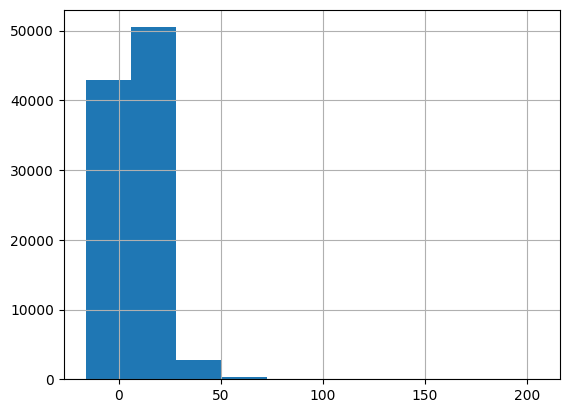

In [46]:
orders_df.delivery_time.hist()

In [47]:
orders_customer_id = orders_df.customer_id.values
customers_df["status"] = customers_df["customer_id"].isin(orders_customer_id).map({True: "Active", False: "Non Active"})
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
50507,c14a1f8f7ebc33fced32cd35f5e4b385,94f8078fdb27aa4d2b5865d1da53a27f,11900,registro,SP,Active
48876,0fc069caee5336cc0871eb88bdb10461,be3cff68d8c57a2e08829e4bb545611e,22470,rio de janeiro,RJ,Active
47670,6763c676c2f00cf34f6573b3e0b4750b,0b0bf652a00ac3369f72ed445286c666,21941,rio de janeiro,RJ,Active
94584,f2f8162922524931c0b80e4b8c0fec61,b33e5827dfc95f97e4f8498bebea77a3,78600,barra do garcas,MT,Active
40908,cd0e8801fd897edcf7c6c0841edbc2e2,183fc2e91b8d23c3b695906d654d3abc,84035,ponta grossa,PR,Active


In [48]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


**Insight:**
Get active customer in count of 99441

Visualization & Explanatory Analysis

In [49]:
customer_orders_df = pd.merge(
    left = customers_df,
    right = orders_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [50]:
customer_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [51]:
customer_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [52]:
customer_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


In [53]:
customer_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


So, after we show up all of these, we have to merge order payments and order reviews

In [54]:
order_payrev_df = pd.merge(
    left = order_payments_df,
    right = order_reviews_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [55]:
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [56]:
order_payrev_df.sort_values(by="payment_value",ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [57]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Next we have to merge customers orders and order payment & reviews

In [58]:
customers_df = pd.merge(
    left = customer_orders_df,
    right = order_payrev_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


Then we have to merge order items and sellers depends on seller_id


In [59]:
item_seller_df = pd.merge(
    left = order_items_df,
    right = sellers_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [60]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


After that we have to merge products dataset with product category dataset based on product_category_name

In [61]:
product_df = pd.merge(
    left = products_df,
    right = product_category_df,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [62]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [63]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


Next we have to merge items seller with product based on product_id

In [64]:
sellers_df = pd.merge(
    left = product_df,
    right = item_seller_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [65]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [66]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

Now we have to explore geolocation dataset

In [67]:
geolocation_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
657671,39237,-18.756990,-44.903525,felixlandia,MG
572453,32223,-19.962074,-44.034611,contagem,MG
592687,35420,-20.363015,-43.420587,mariana,MG
94321,4567,-23.615451,-46.686802,sao paulo,SP
8424,1309,-23.553624,-46.659699,sao paulo,SP
923682,89199,-26.782085,-50.006519,santa terezinha,SC
749230,63195,-7.000551,-39.743492,altaneira,CE
477097,24440,-22.827776,-43.053581,sao goncalo,RJ
524292,28960,-22.845077,-42.238085,iguaba grande,RJ
269915,12289,-23.068659,-45.712676,cacapava,SP


In [68]:
def pretty_string(column):
  column_space = ' '.join(column.split())
  return unidecode.unidecode(column_space.lower())

In [69]:
geolocation_df['geolocation_ciy'] = geolocation_df['geolocation_city'].apply(pretty_string)

In [70]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [71]:
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_ciy
470805,24220,-22.905817,-43.106989,niteroi,RJ,niteroi
470811,24220,-22.902306,-43.112545,niteroi,RJ,niteroi
470812,24220,-22.904567,-43.110491,niteroi,RJ,niteroi
470820,24220,-22.902575,-43.109192,niteroi,RJ,niteroi
470821,24220,-22.907500,-43.106170,niteroi,RJ,niteroi


Now we have to merge all cleaned data into a new csv

In [72]:
all_dataset = pd.merge(
    left = customers_df,
    right = sellers_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
all_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [73]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [74]:
all_dataset.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [75]:
all_dataset.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [76]:
all_dataset.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending = False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [77]:
all_dataset.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [78]:
all_dataset.to_csv('all_dataset.csv', index=False)

## Visualization & Explanatory Analysis

### 1st Question: What is the Most and Least Popular Sold Products on the E-Commerce?

In [79]:
count_ordered_products_df = all_dataset.groupby("product_category_name_english")["product_id"].count().reset_index()
count_ordered_products_df = count_ordered_products_df.rename(columns={"product_id": "products"})
count_ordered_products_df = count_ordered_products_df.sort_values(by="products", ascending = False)
count_ordered_products_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-80-68df9cb597dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "products", y = "product_category_name_english", data = count_ordered_products_df.head(5), palette = colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pa

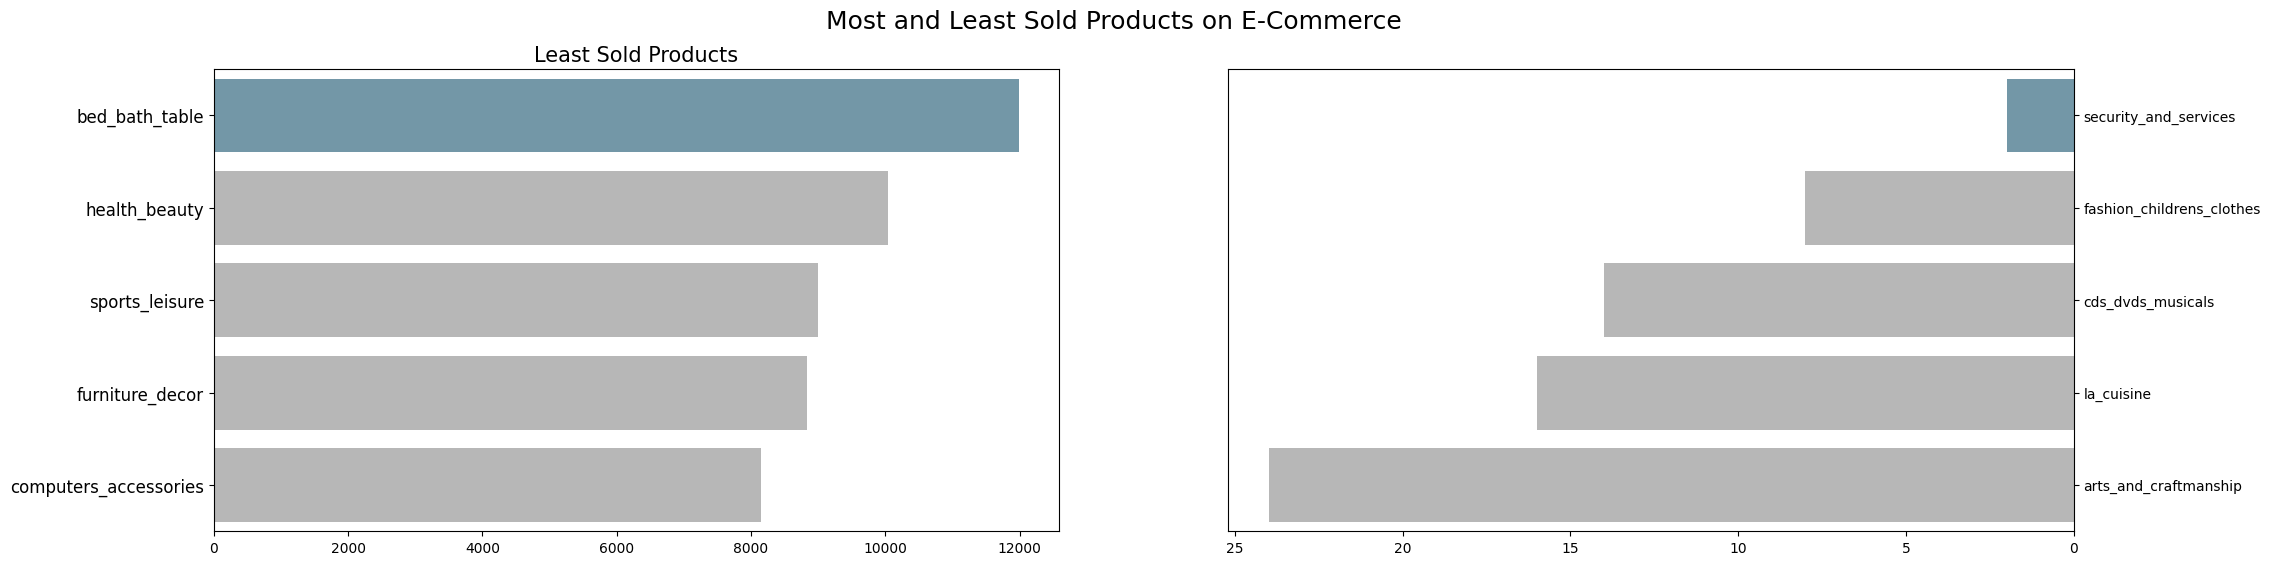

In [80]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24,6))

colors = ["#6A9AB0", "#B7B7B7", "#B7B7B7", "#B7B7B7", "#B7B7B7"]
sns.barplot(x = "products", y = "product_category_name_english", data = count_ordered_products_df.head(5), palette = colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Most  Sold Products", loc = "center", fontsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(x = "products", y = "product_category_name_english", data = count_ordered_products_df.sort_values(by="products", ascending = True).head(5), palette = colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[0].set_title("Least Sold Products", loc = "center", fontsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 12)

plt.suptitle("Most and Least Sold Products on E-Commerce", fontsize = 18)
plt.show()

Least sold products are security_and_services and the most sold products are in bed_bath_table

### 2nd Question: How do customers rate on the E-Commerce's Services?

<ipython-input-81-c8af80ede2d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

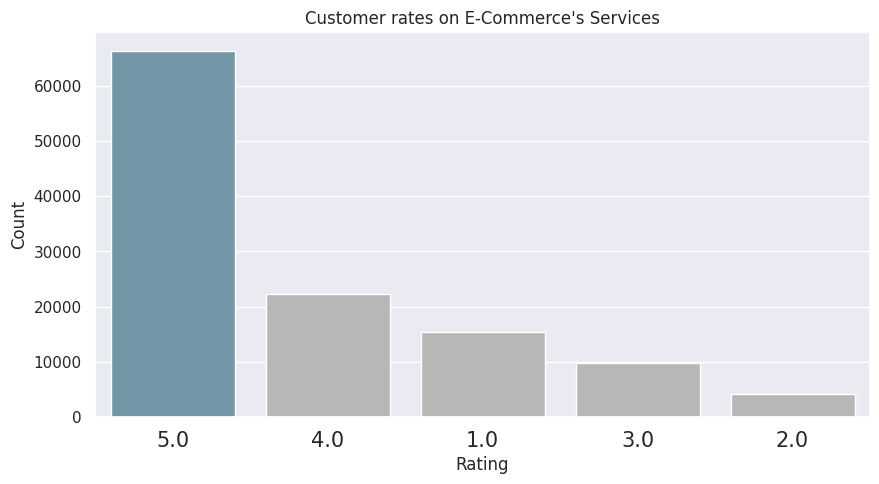

In [81]:
rating_points = all_dataset['review_score'].value_counts().sort_values(ascending = False)

most_common_rating_point = rating_points.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize = (10,5))
sns.barplot(
    x = rating_points.index,
    y = rating_points.values,
    order = rating_points.index,
    palette = ["#6A9AB0" if rating == most_common_rating_point else "#B7B7B7" for rating in rating_points.index]
    )

plt.title("Customer rates on E-Commerce's Services")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize = 15)
plt.show()

In the chart above, it is shown that the customers who give 5 on the rate to E-Commerce' service is the most highes than others.

**Insight:**
- xxx
- xxx

### 3rd Question: Which city is the most customers come from?

<ipython-input-82-35c6019eb61c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

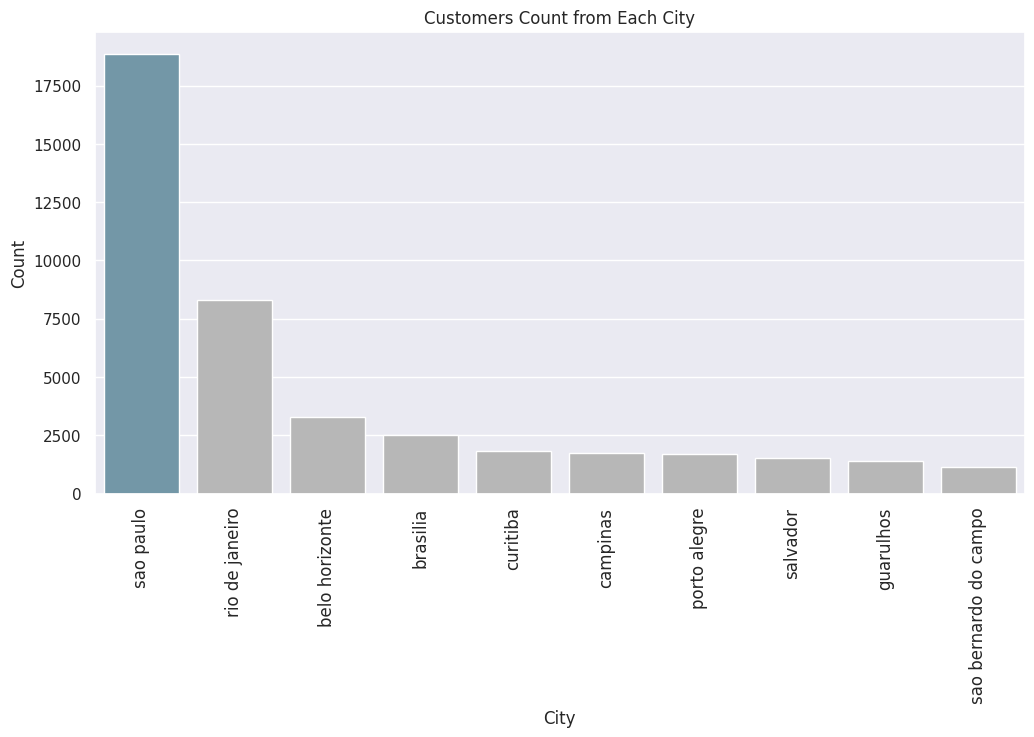

In [82]:
customers_city = all_dataset['customer_city'].value_counts().head(10)

plt.figure(figsize = (12,6))
most_city_from = customers_city.idxmax()

customers_city = customers_city.sort_values(ascending = False)

sns.barplot(
    x = customers_city.index,
    y = customers_city.values,
    palette = ["#6A9AB0" if city == most_city_from else "#B7B7B7" for city in customers_city.index]
    )

plt.title("Customers Count from Each City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

Sao paulo is the city with the most customers on E-Commerce

### 4th Question: From the city that most customers come from, what is the most order status?

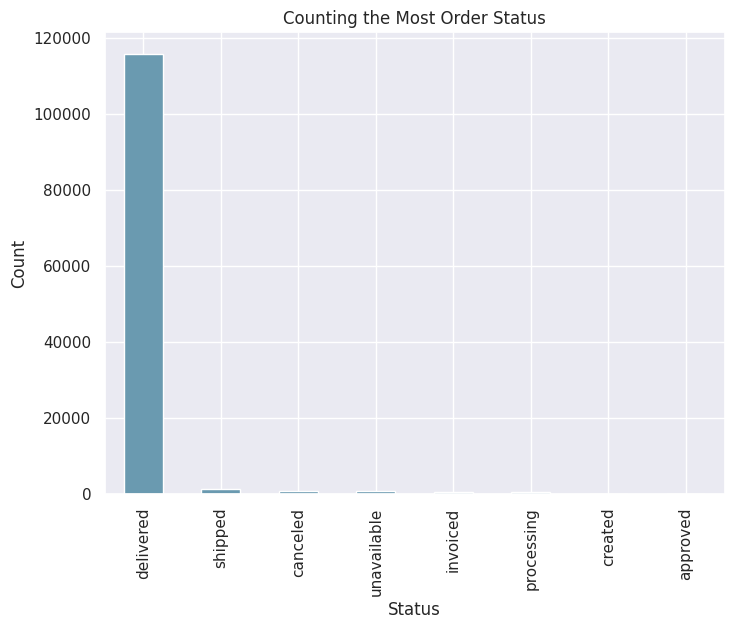

In [83]:
counting_order_status = all_dataset['order_status'].value_counts()

plt.figure(figsize = (8,6))
counting_order_status.plot(kind = 'bar', color = '#6A9AB0')
plt.title('Counting the Most Order Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

From the chart above, the most order status are delivered to the city Sao Paulo

### 5th Question : Which place will be the most customers based on Sao Paulo country (Brazil)?

In [84]:
other_states_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name = 'count')
other_states_geolocation[other_states_geolocation['count'] >= 2].shape
maximum_state = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count', axis = 1)

In [85]:
geolocation_min = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geolocation_min = geolocation_min.merge(maximum_state, on = ['geolocation_zip_code_prefix', 'geolocation_state'], how = 'inner')

In [86]:
customers_min = customers_df.merge(
  geolocation_min,
  left_on = 'customer_zip_code_prefix',
  right_on = 'geolocation_zip_code_prefix',
  how = 'inner'
)

In [87]:
customers_min.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.727636,-46.542279
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,9790,são bernardo do campo,SP,-23.726085,-46.544829
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531408,-46.656404
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1151,são paulo,SP,-23.531294,-46.656676


In [88]:
customers_min.to_csv("geolocation.csv", index = False)

In [89]:

def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

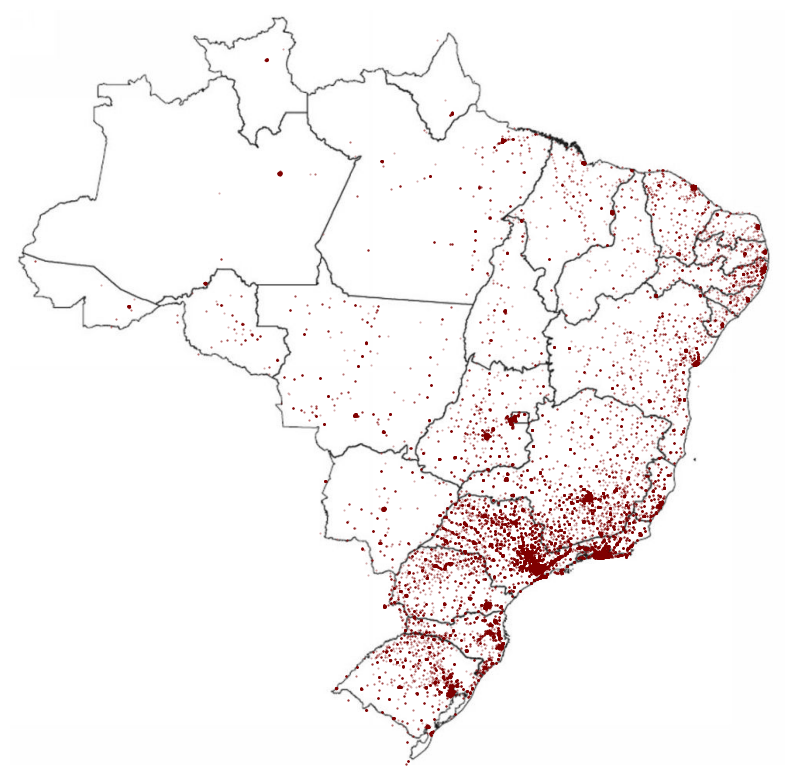

In [90]:
plot_brazil_map(customers_min.drop_duplicates(subset = 'customer_unique_id'))

## Conclusion

# 1. What is the most and least popular sold products on the E-Commerce?
Bed Bath Table is the most popular and Security_and_services is the least popular

# 2. How do customers rate on the E-Commerce's Services?
in a rate of 5, it is counted until above 6000 ratings, and it is the highest customers rate from others.

# 3. Which city is the most customers come from?
It is sao paulo with customers 17.500 above.

# 4. From the city that most customers come from (Sao Paulo), what is the most order status?
It is delivered with 100.000 more orders.